In [1]:
# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visuals
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv(r"C:\Users\gudek\OneDrive\Desktop\college notes\Titanic-Dataset.csv")

print("=== EXPLORATORY DATA ANALYSIS - TITANIC DATASET ===")
print(f"Dataset Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

=== EXPLORATORY DATA ANALYSIS - TITANIC DATASET ===
Dataset Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [2]:
# Step 2: Basic Dataset Overview
print("=== DATASET OVERVIEW ===")

# Basic info
print("\n1. BASIC INFORMATION:")
df.info()

# Summary statistics
print("\n2. SUMMARY STATISTICS:")
print(df.describe())

# Check for missing values
print("\n3. MISSING VALUES:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
})
print(missing_df[missing_df['Missing Count'] > 0])

=== DATASET OVERVIEW ===

1. BASIC INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

2. SUMMARY STATISTICS:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838  


=== UNIVARIATE ANALYSIS - NUMERICAL FEATURES ===
Analyzing numerical features: ['Age', 'Fare', 'SibSp', 'Parch']


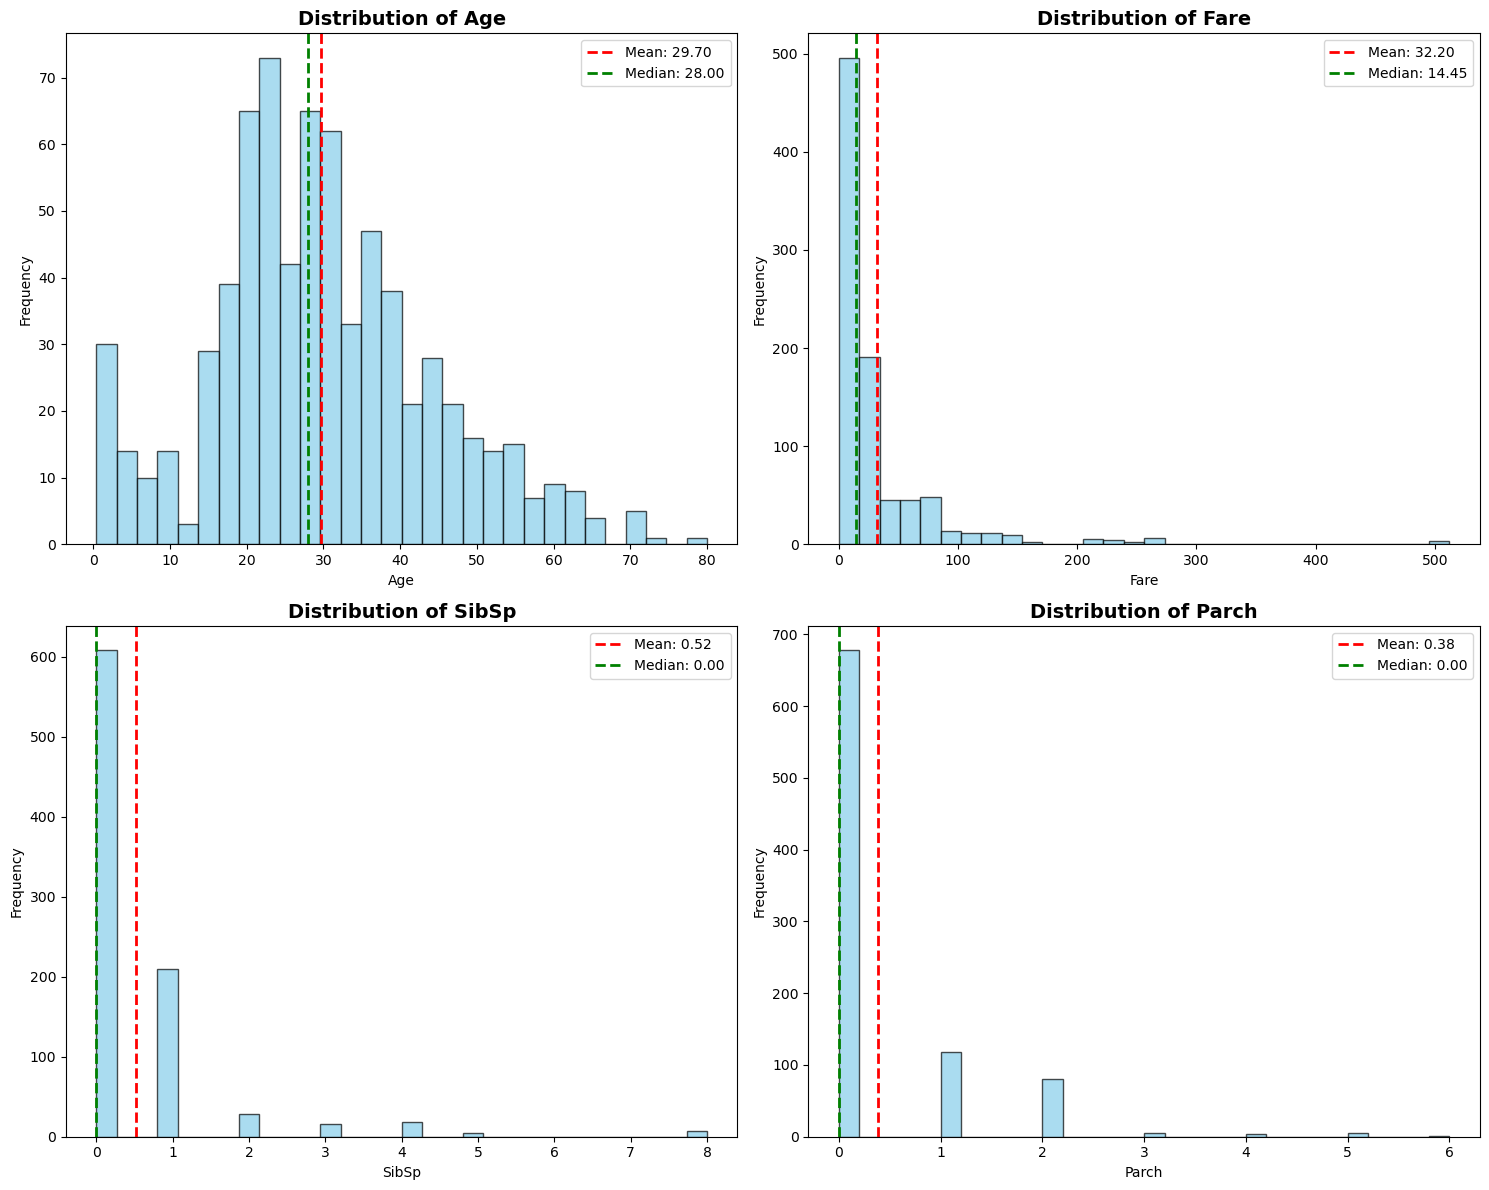


DETAILED STATISTICS FOR NUMERICAL FEATURES:

--- Age ---
Mean: 29.70
Median: 28.00
Standard Deviation: 14.53
Range: 0.42 - 80.00
Skewness: 0.39
Missing Values: 177

--- Fare ---
Mean: 32.20
Median: 14.45
Standard Deviation: 49.69
Range: 0.00 - 512.33
Skewness: 4.79
Missing Values: 0

--- SibSp ---
Mean: 0.52
Median: 0.00
Standard Deviation: 1.10
Range: 0.00 - 8.00
Skewness: 3.70
Missing Values: 0

--- Parch ---
Mean: 0.38
Median: 0.00
Standard Deviation: 0.81
Range: 0.00 - 6.00
Skewness: 2.75
Missing Values: 0


In [3]:
# Step 3: Univariate Analysis - Numerical Features
print("\n=== UNIVARIATE ANALYSIS - NUMERICAL FEATURES ===")

# Select numerical features
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
print(f"Analyzing numerical features: {numerical_features}")

# Create subplots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Histogram with KDE
    axes[i].hist(df[feature].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    
    # Add statistical annotations
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Detailed statistics for each numerical feature
print("\nDETAILED STATISTICS FOR NUMERICAL FEATURES:")
for feature in numerical_features:
    print(f"\n--- {feature} ---")
    print(f"Mean: {df[feature].mean():.2f}")
    print(f"Median: {df[feature].median():.2f}")
    print(f"Standard Deviation: {df[feature].std():.2f}")
    print(f"Range: {df[feature].min():.2f} - {df[feature].max():.2f}")
    print(f"Skewness: {df[feature].skew():.2f}")
    print(f"Missing Values: {df[feature].isnull().sum()}")


=== UNIVARIATE ANALYSIS - CATEGORICAL FEATURES ===
Analyzing categorical features: ['Pclass', 'Sex', 'Embarked', 'Survived']


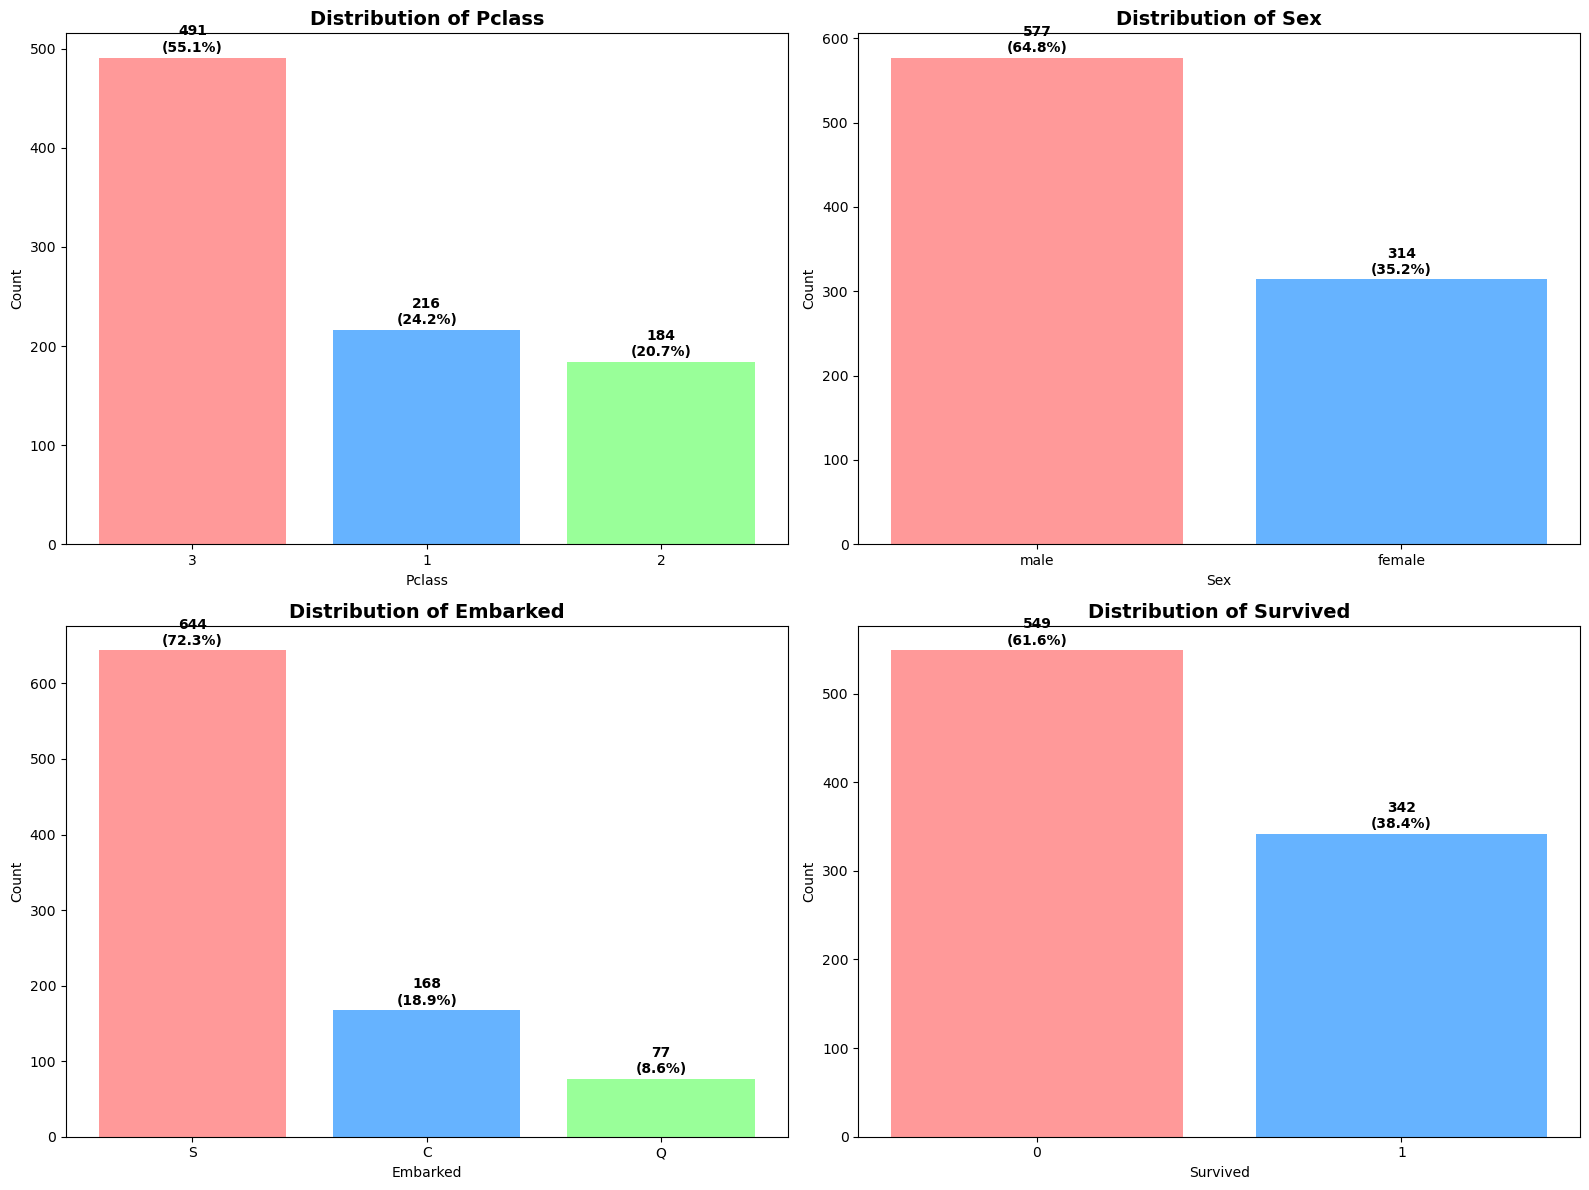


DETAILED VALUE COUNTS FOR CATEGORICAL FEATURES:

--- Pclass ---
3: 491 (55.1%)
1: 216 (24.2%)
2: 184 (20.7%)

--- Sex ---
male: 577 (64.8%)
female: 314 (35.2%)

--- Embarked ---
S: 644 (72.3%)
C: 168 (18.9%)
Q: 77 (8.6%)

--- Survived ---
0: 549 (61.6%)
1: 342 (38.4%)


In [4]:
# Step 4: Univariate Analysis - Categorical Features
print("\n=== UNIVARIATE ANALYSIS - CATEGORICAL FEATURES ===")

categorical_features = ['Pclass', 'Sex', 'Embarked', 'Survived']
print(f"Analyzing categorical features: {categorical_features}")

# Create subplots for categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Count plot
    value_counts = df[feature].value_counts()
    bars = axes[i].bar(value_counts.index.astype(str), value_counts.values, 
                      color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    axes[i].set_title(f'Distribution of {feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Count')
    
    # Add value labels on bars
    for bar, value in zip(bars, value_counts.values):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + 3,
                    f'{value}\n({value/len(df)*100:.1f}%)',
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Detailed value counts for categorical features
print("\nDETAILED VALUE COUNTS FOR CATEGORICAL FEATURES:")
for feature in categorical_features:
    print(f"\n--- {feature} ---")
    value_counts = df[feature].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"{value}: {count} ({percentage:.1f}%)")


=== BIVARIATE ANALYSIS - RELATIONSHIP WITH SURVIVAL ===


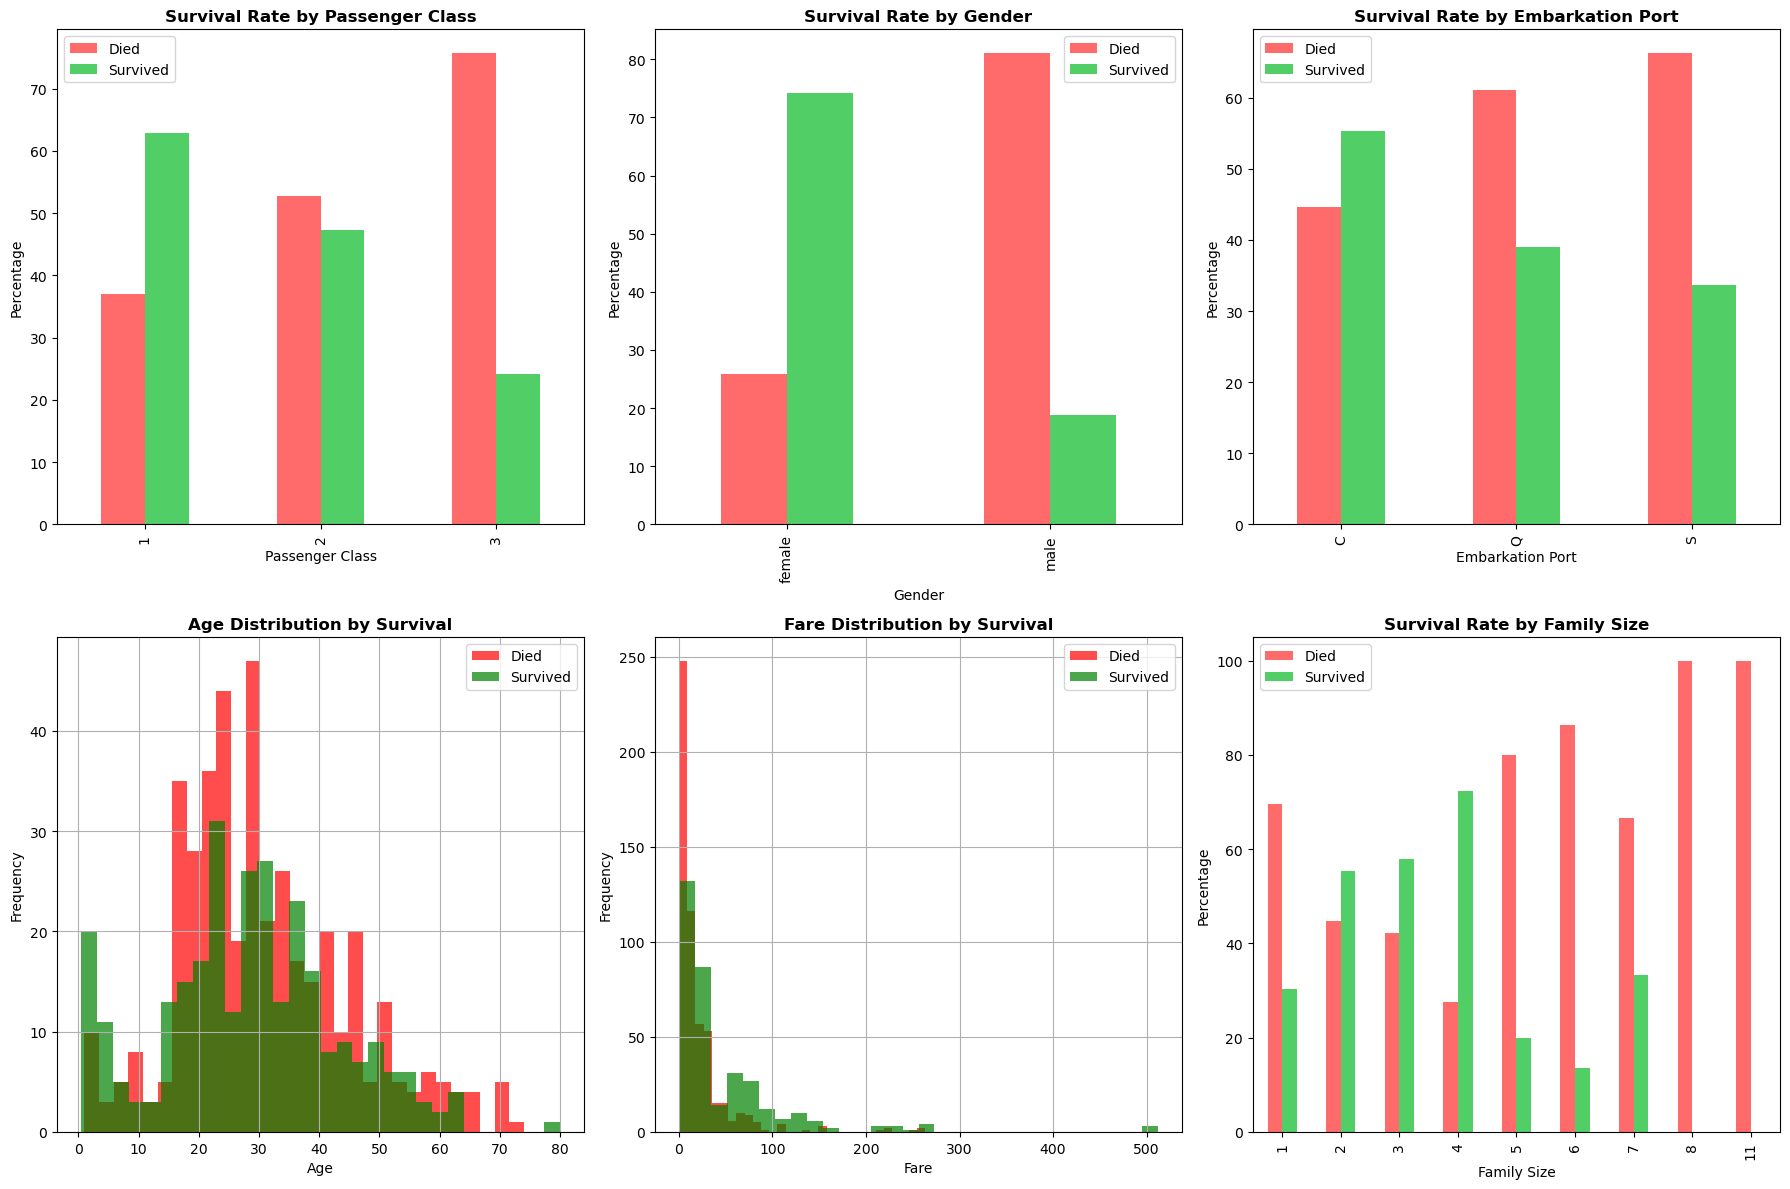


STATISTICAL SIGNIFICANCE OF FEATURES WITH SURVIVAL:
Pclass vs Survival: p-value = 0.000000 ***
Sex vs Survival: p-value = 0.000000 ***
Embarked vs Survival: p-value = 0.000002 ***


In [5]:
# Step 5: Bivariate Analysis - Relationships with Target (Survived)
print("\n=== BIVARIATE ANALYSIS - RELATIONSHIP WITH SURVIVAL ===")

# Survival rate by different features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Survival by Pclass
survival_pclass = pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100
survival_pclass.plot(kind='bar', ax=axes[0,0], color=['#ff6b6b', '#51cf66'])
axes[0,0].set_title('Survival Rate by Passenger Class', fontweight='bold')
axes[0,0].set_xlabel('Passenger Class')
axes[0,0].set_ylabel('Percentage')
axes[0,0].legend(['Died', 'Survived'])

# 2. Survival by Sex
survival_sex = pd.crosstab(df['Sex'], df['Survived'], normalize='index') * 100
survival_sex.plot(kind='bar', ax=axes[0,1], color=['#ff6b6b', '#51cf66'])
axes[0,1].set_title('Survival Rate by Gender', fontweight='bold')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Percentage')
axes[0,1].legend(['Died', 'Survived'])

# 3. Survival by Embarked
survival_embarked = pd.crosstab(df['Embarked'], df['Survived'], normalize='index') * 100
survival_embarked.plot(kind='bar', ax=axes[0,2], color=['#ff6b6b', '#51cf66'])
axes[0,2].set_title('Survival Rate by Embarkation Port', fontweight='bold')
axes[0,2].set_xlabel('Embarkation Port')
axes[0,2].set_ylabel('Percentage')
axes[0,2].legend(['Died', 'Survived'])

# 4. Age distribution by Survival
df[df['Survived'] == 0]['Age'].dropna().hist(ax=axes[1,0], alpha=0.7, label='Died', bins=30, color='red')
df[df['Survived'] == 1]['Age'].dropna().hist(ax=axes[1,0], alpha=0.7, label='Survived', bins=30, color='green')
axes[1,0].set_title('Age Distribution by Survival', fontweight='bold')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# 5. Fare distribution by Survival
df[df['Survived'] == 0]['Fare'].hist(ax=axes[1,1], alpha=0.7, label='Died', bins=30, color='red')
df[df['Survived'] == 1]['Fare'].hist(ax=axes[1,1], alpha=0.7, label='Survived', bins=30, color='green')
axes[1,1].set_title('Fare Distribution by Survival', fontweight='bold')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

# 6. Survival by Family Size (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
survival_family = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index') * 100
survival_family.plot(kind='bar', ax=axes[1,2], color=['#ff6b6b', '#51cf66'])
axes[1,2].set_title('Survival Rate by Family Size', fontweight='bold')
axes[1,2].set_xlabel('Family Size')
axes[1,2].set_ylabel('Percentage')
axes[1,2].legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

# Statistical significance of relationships
print("\nSTATISTICAL SIGNIFICANCE OF FEATURES WITH SURVIVAL:")
# Chi-square test for categorical features
categorical_for_test = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_for_test:
    contingency_table = pd.crosstab(df[feature], df['Survived'])
    chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{feature} vs Survival: p-value = {p_value:.6f} {'***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'not significant'}")


=== CORRELATION ANALYSIS ===


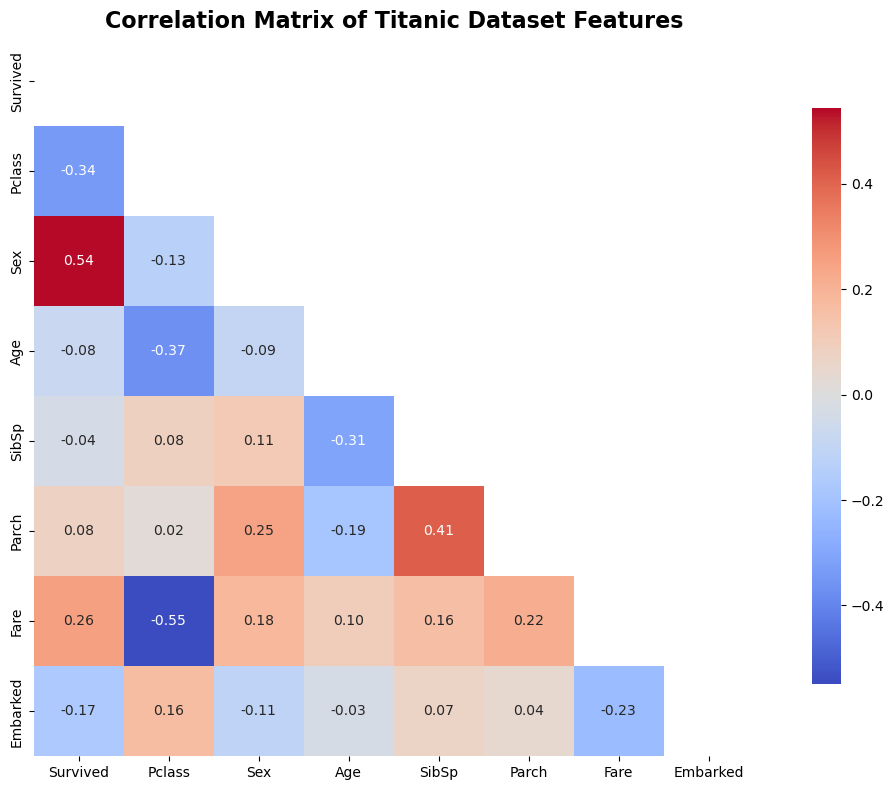


TOP CORRELATIONS WITH SURVIVAL:
Sex: 0.543
Fare: 0.257
Parch: 0.082
SibSp: -0.035
Age: -0.077
Embarked: -0.170
Pclass: -0.338


In [6]:
# Step 6: Correlation Analysis
print("\n=== CORRELATION ANALYSIS ===")

# Prepare data for correlation matrix
corr_df = df.copy()

# Encode categorical variables for correlation
corr_df['Sex'] = corr_df['Sex'].map({'male': 0, 'female': 1})
corr_df['Embarked'] = corr_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select numerical columns for correlation
corr_columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
correlation_matrix = corr_df[corr_columns].corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, mask=mask, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Titanic Dataset Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with survival
print("\nTOP CORRELATIONS WITH SURVIVAL:")
survival_corr = correlation_matrix['Survived'].sort_values(ascending=False)
for feature, corr_value in survival_corr.items():
    if feature != 'Survived':
        print(f"{feature}: {corr_value:.3f}")


=== MULTIVARIATE ANALYSIS - PAIRPLOT ===


<Figure size 1200x1000 with 0 Axes>

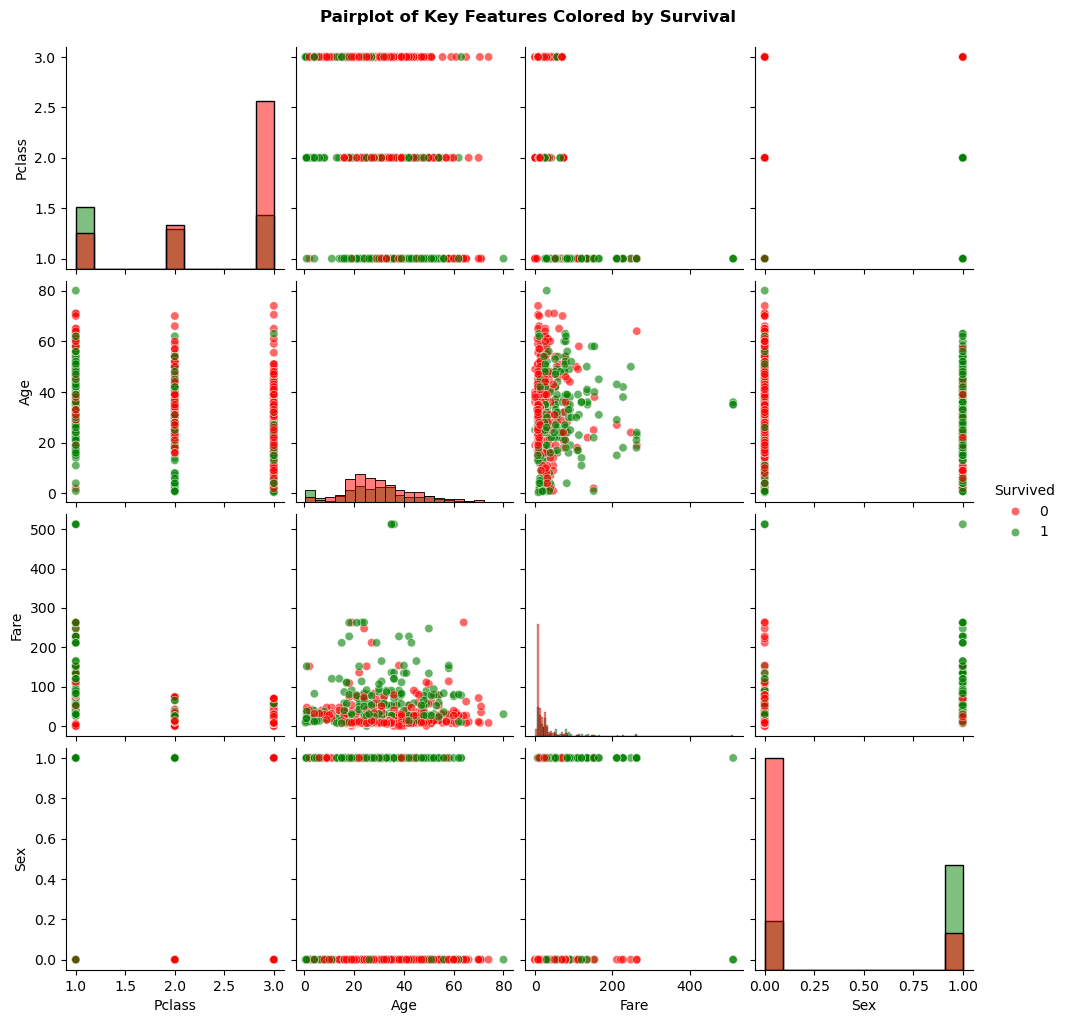

In [7]:
# Step 7: Pairplot for Multivariate Analysis
print("\n=== MULTIVARIATE ANALYSIS - PAIRPLOT ===")

# Select key features for pairplot
pairplot_features = ['Survived', 'Pclass', 'Age', 'Fare', 'Sex']
pairplot_df = df[pairplot_features].copy()
pairplot_df['Sex'] = pairplot_df['Sex'].map({'male': 0, 'female': 1})

# Create pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(pairplot_df, hue='Survived', palette={0: 'red', 1: 'green'}, 
             diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Features Colored by Survival', y=1.02, fontweight='bold')
plt.show()


=== ADVANCED VISUALIZATIONS AND INSIGHTS ===


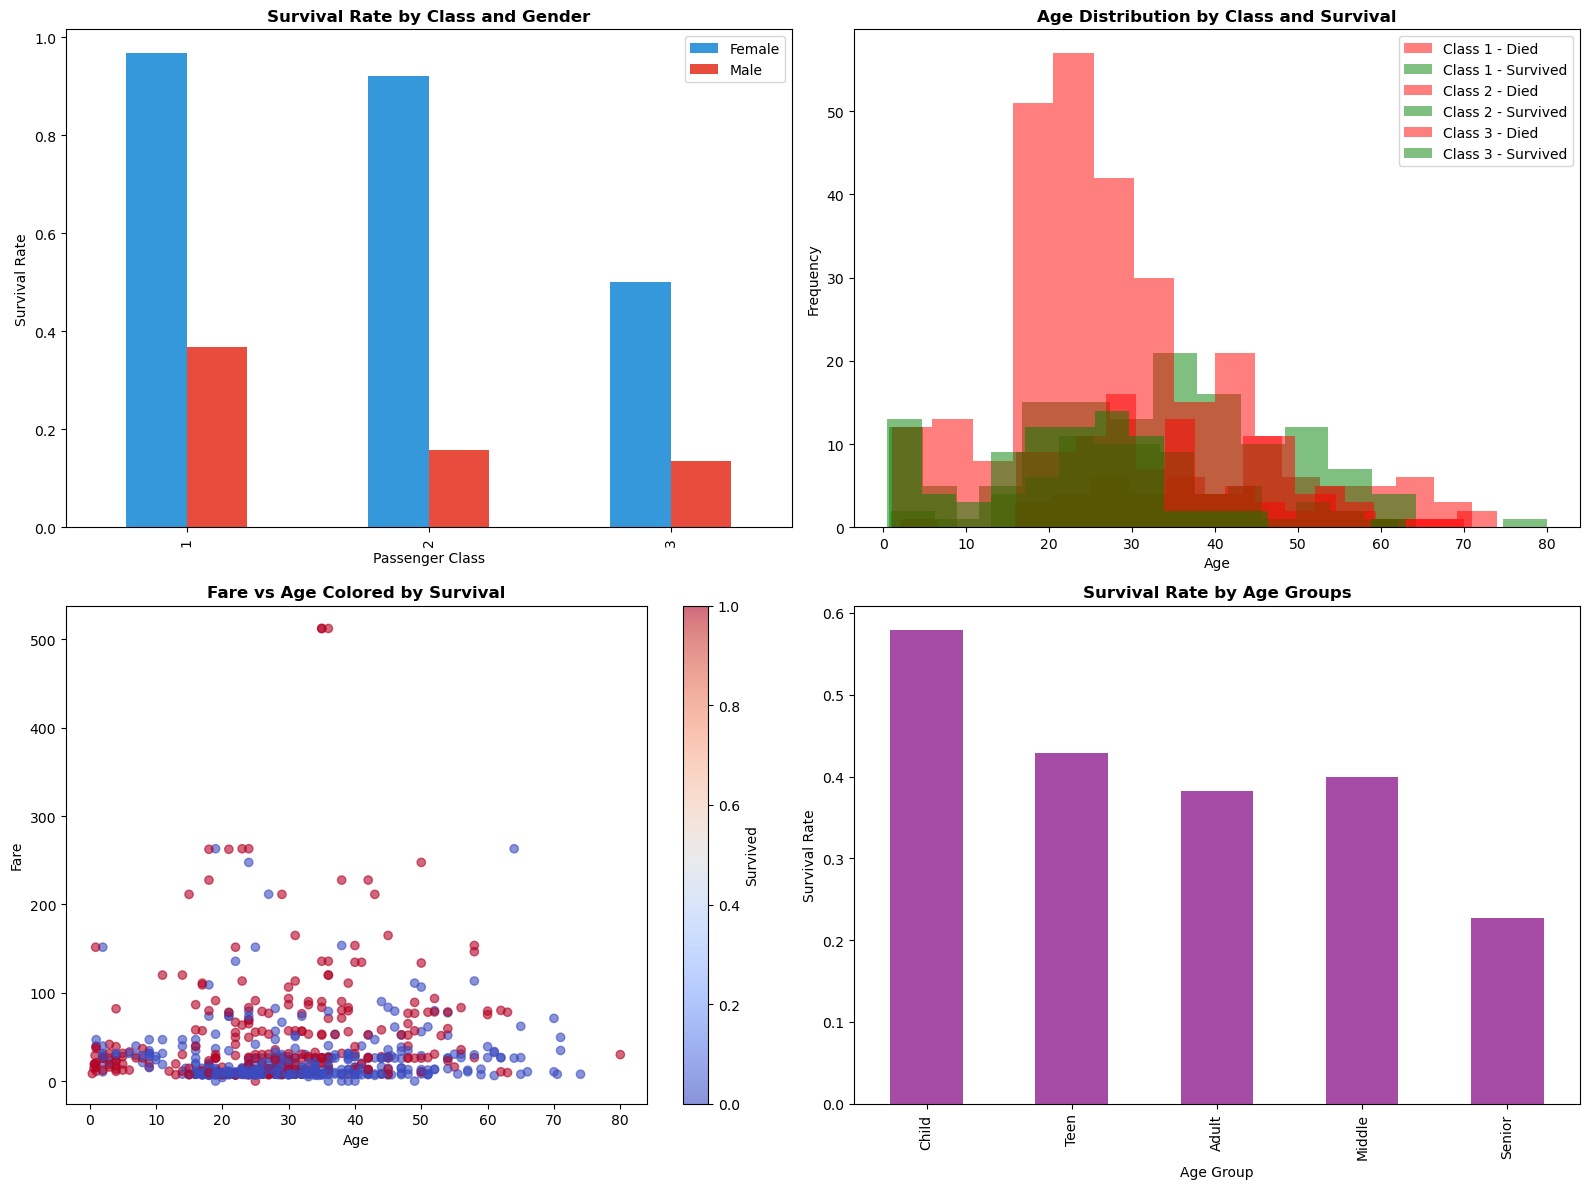

In [8]:
# Step 8: Advanced Visualizations and Insights
print("\n=== ADVANCED VISUALIZATIONS AND INSIGHTS ===")

# Create a comprehensive survival analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Survival rate by Class and Gender
class_sex_survival = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
class_sex_survival.plot(kind='bar', ax=axes[0,0], color=['#3498db', '#e74c3c'])
axes[0,0].set_title('Survival Rate by Class and Gender', fontweight='bold')
axes[0,0].set_xlabel('Passenger Class')
axes[0,0].set_ylabel('Survival Rate')
axes[0,0].legend(['Female', 'Male'])

# 2. Age distribution by Class and Survival
for pclass in [1, 2, 3]:
    for survived in [0, 1]:
        subset = df[(df['Pclass'] == pclass) & (df['Survived'] == survived)]['Age'].dropna()
        color = 'green' if survived == 1 else 'red'
        axes[0,1].hist(subset, alpha=0.5, label=f'Class {pclass} - {"Survived" if survived == 1 else "Died"}', 
                       color=color, bins=15)
axes[0,1].set_title('Age Distribution by Class and Survival', fontweight='bold')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Frequency')
axes[0,1].legend()

# 3. Fare vs Age colored by Survival
scatter = axes[1,0].scatter(df['Age'], df['Fare'], c=df['Survived'], 
                           cmap='coolwarm', alpha=0.6)
axes[1,0].set_title('Fare vs Age Colored by Survival', fontweight='bold')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Fare')
plt.colorbar(scatter, ax=axes[1,0], label='Survived')

# 4. Survival rate by Age Groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
age_survival = df.groupby('AgeGroup')['Survived'].mean()
age_survival.plot(kind='bar', ax=axes[1,1], color='purple', alpha=0.7)
axes[1,1].set_title('Survival Rate by Age Groups', fontweight='bold')
axes[1,1].set_xlabel('Age Group')
axes[1,1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()